# Brain Tumor Detection using CNN

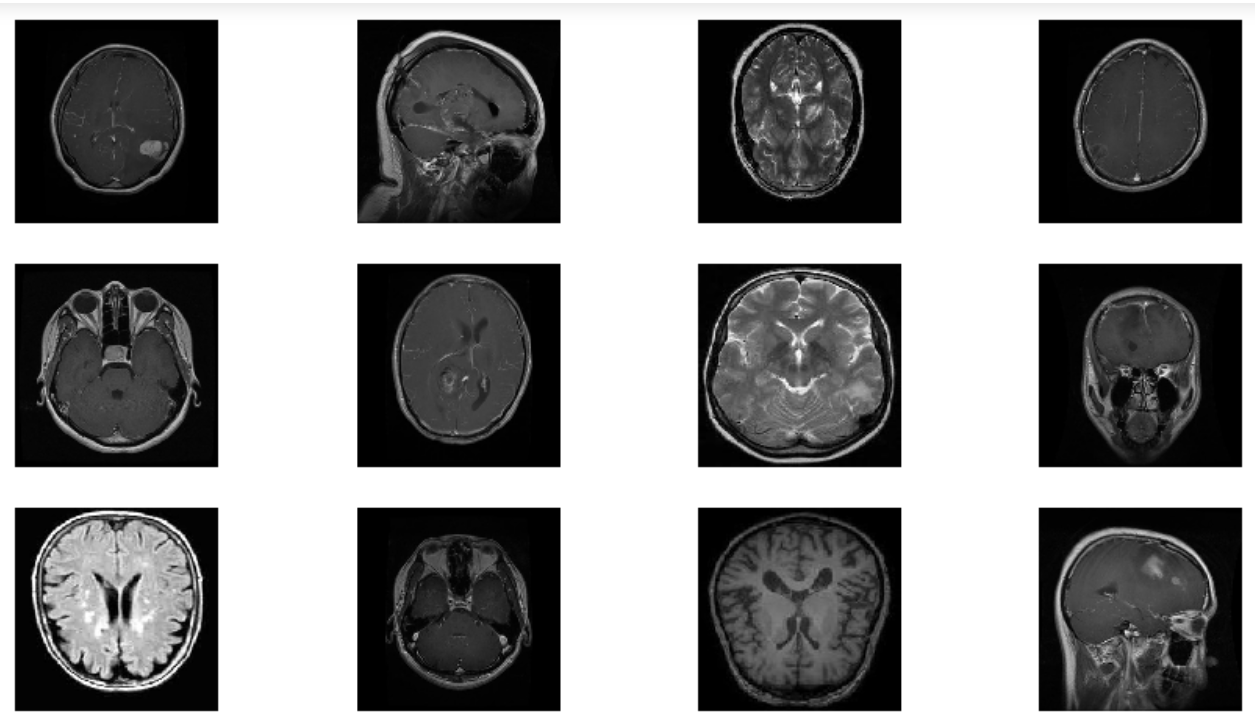

In [1]:
import numpy as np
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Augmentation

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/train',target_size=(224,224),batch_size=32,shuffle=True,class_mode='binary')

Found 215 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/test',target_size=(224,224),batch_size=16,shuffle=False,class_mode='binary')

Found 32 images belonging to 2 classes.


# Build the Model

In [16]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=224 , kernel_size=3 , activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=224 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))
cnn.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [17]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 224)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 224)     451808    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 224)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 54, 54, 224)       0         
                                                                 
 flatten_2 (Flatten)         (None, 653184)           

# Use T4 GPU in Google Colab for faster training speed.

**Use Early Stopping: Initial epoch = 100. Then apply early stopping to get the optimum epoch. Early Stopping is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set.**

In [21]:
model = cnn.fit(x = training_set , validation_data = test_set , epochs = 15)

Epoch 1/15
7/7 [==============================] - 7s 927ms/step - loss: 0.1504 - accuracy: 0.9395 - val_loss: 0.3204 - val_accuracy: 0.9375
Epoch 2/15
7/7 [==============================] - 4s 594ms/step - loss: 0.1292 - accuracy: 0.9442 - val_loss: 0.3281 - val_accuracy: 0.9375
Epoch 3/15
7/7 [==============================] - 4s 592ms/step - loss: 0.1370 - accuracy: 0.9442 - val_loss: 0.2738 - val_accuracy: 0.9375
Epoch 4/15
7/7 [==============================] - 6s 838ms/step - loss: 0.1699 - accuracy: 0.9302 - val_loss: 0.3601 - val_accuracy: 0.9062
Epoch 5/15
7/7 [==============================] - 4s 592ms/step - loss: 0.1335 - accuracy: 0.9535 - val_loss: 0.3374 - val_accuracy: 0.8750
Epoch 6/15
7/7 [==============================] - 4s 637ms/step - loss: 0.1264 - accuracy: 0.9628 - val_loss: 0.3899 - val_accuracy: 0.8750
Epoch 7/15
7/7 [==============================] - 6s 859ms/step - loss: 0.1344 - accuracy: 0.9349 - val_loss: 0.3223 - val_accuracy: 0.9062
Epoch 8/15
7/7 [====

In [22]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']

# Data Visualization

In [23]:
import matplotlib.pyplot as plt

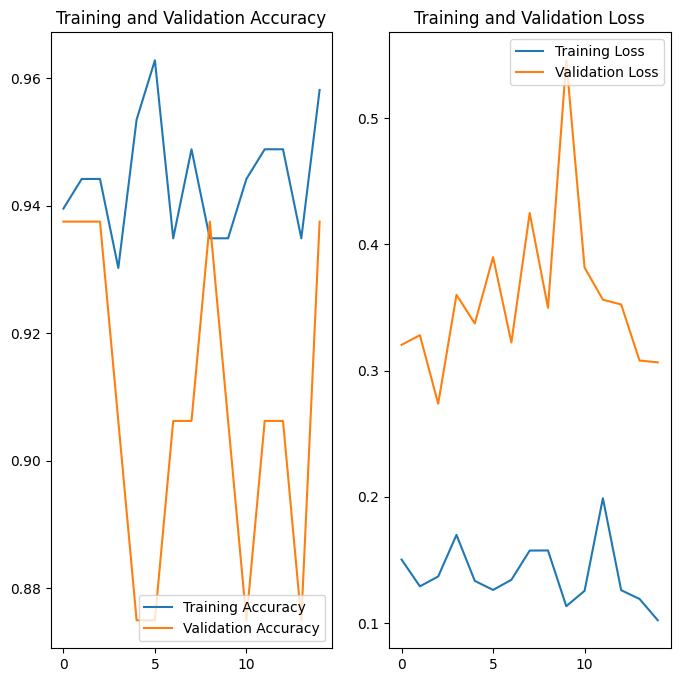

In [24]:
plt.figure(figsize=(8, 8))
epochs_range = range(15)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the Model

In [25]:
cnn.save("/content/drive/MyDrive/Colab Notebooks/brain.keras")
print("Saved model to disk")

Saved model to disk


# Load the Model

In [26]:
from tensorflow import keras
from keras.models import load_model

# load model
model = load_model('/content/drive/MyDrive/Colab Notebooks/brain.keras')

# Model Evaluation

In [27]:
score = model.evaluate(training_set, verbose = 0)

print('Training loss:', score[0])
print('Training Accuracy:', score[1])
print('Training Accuracy (%):', f"{score[1]*100:.2f}")

Training loss: 0.04131738469004631
Training Accuracy: 0.9860464930534363
Training Accuracy (%): 98.60


In [28]:
score = model.evaluate(test_set, verbose = 0)

print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('Validation accuracy (%):', f"{score[1]*100:.2f}")

Validation loss: 0.3066025376319885
Validation accuracy: 0.9375
Validation accuracy (%): 93.75


# Prediction

In [29]:
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/prediction/no1.jpg',target_size=(224,224))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image)
training_set.class_indices

print(result)

1/1 [==============================] - 0s 445ms/step
[[0.]]


In [30]:
if result[0][0] == 1:
    print('Yes. Brain Tumor Detected')
else:
    print('NO. Brain Tumor Not Detected')

NO. Brain Tumor Not Detected


In [31]:
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/prediction/yes1.jpg',target_size=(224,224))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image)
training_set.class_indices

print(result)

1/1 [==============================] - 0s 23ms/step
[[1.]]


In [32]:
if result[0][0] == 1:
    print('Yes. Brain Tumor Detected')
else:
    print('NO. Brain Tumor Not Detected')

Yes. Brain Tumor Detected


# Web App using Streamlit

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [2]:
!npm install localtunnel


npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.816s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [3]:
%%writefile app.py

import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

hide_streamlit_style = """

            #MainMenu {visibility: hidden;}


            """
st.title('Brain Tumor Detection using CNN')

def main() :
    file_uploaded = st.file_uploader('Choose an image...', type = ['jpg','jpeg','png'])

    if file_uploaded is not None :
        image = Image.open(file_uploaded)
        st.write("Uploaded Image.")
        left_co, cent_co,last_co = st.columns(3)
        with cent_co:
            st.image(image)

        if st.button('Predict', type = 'primary'):

           with st.spinner('Loading the model...'):

                # load model

                model = load_model('/content/drive/MyDrive/Colab Notebooks/brain.keras')


           # Image Augmentation of validation data

           test_datagen = ImageDataGenerator(rescale=1./255)
           test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/test',target_size=(224,224),batch_size=16,shuffle=False,class_mode='binary')


           # Preprocess the image

           # Resize the image to 224x224
           image = image.resize((224, 224))

           # Convert grayscale image to RGB
           image = image.convert('RGB')


           test_image = tf.keras.utils.img_to_array(image)
           test_image = np.expand_dims(test_image, axis=0)


           # Predict

           with st.spinner('Just a moment...'):
                result = model.predict(test_image)
                score = model.evaluate(test_set, verbose = 0)

           if result[0][0] == 1:
                st.write('Yes. Brain Tumor Detected')
           else:
                st.write('NO. Brain Tumor Not Detected')

           st.write('Accuracy (%):', f"{score[1]*100:.2f}")


if __name__ == '__main__':
    main()




Writing app.py


In [4]:
!streamlit run app.py &>/content/logs.txt &


In [5]:
!npx localtunnel --port 8501

npx: installed 22 in 3.389s
your url is: https://five-sheep-rest.loca.lt
^C
